## **SETUP**

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy.ma as ma
import os
scaler_input = StandardScaler()
scaler_output = StandardScaler()

# **LOADING DATA**

In [2]:

SteadyState_Input = []

base_path = r'C:\\Users\\ismai\\OneDrive\\Desktop\\CFD Dissertation\\Files\\CSV training\\SteadyCSV'

transient_base_path = r'C:\\Users\\ismai\\OneDrive\\Desktop\\CFD Dissertation\\Files\\CSV training\\ML_OuputMaxV_CSV'

SteadyState_Input = []
Transient_Output = []

for i in range(1, 41):  # Loop from N1 to N40
    # Construct the steady state file path
    steady_folder_name = f"N{i}Steady"
    steady_file_name = f"N{i}SPVS.csv"
    steady_file_path = os.path.join(base_path, steady_folder_name, steady_file_name)
    
    # Construct the transient file path (assuming a similar naming convention)
    transient_folder_name = f"N{i}"
    transient_file_name = f"N{i}TPV.csv"
    transient_file_path = os.path.join(transient_base_path, transient_folder_name, transient_file_name)

      
    NP = pd.read_csv(steady_file_path)
    NP = NP.replace(' null', 0)
    NPSteady_velocity = NP.iloc[:, 4].values.reshape(-1, 1)
    NPSteady_velocity = scaler_input.fit_transform(NPSteady_velocity)
    SteadyState_Input.append(NPSteady_velocity)

    # Process the transient CSV
    NT = pd.read_csv(transient_file_path)
    NT = NT.replace(' null', 0)
    NPTransient_velocity = NT.iloc[:, 4].values.reshape(-1, 1)
    NPTransient_velocity = scaler_output.fit_transform(NPTransient_velocity)
    Transient_Output.append(NPTransient_velocity)




# **LSTM**

In [4]:
#https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
#https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
SteadyState_Input_LSTM = np.concatenate(SteadyState_Input)
Transient_Output_LSTM = np.concatenate(Transient_Output)
SteadyState_Input_LSTM_Reshape = SteadyState_Input_LSTM.reshape((SteadyState_Input_LSTM.shape[0], 1, SteadyState_Input_LSTM.shape[1]))
Steady_train, Steady_test, Transient_train, Transient_test = train_test_split(SteadyState_Input_LSTM_Reshape, Transient_Output_LSTM, test_size=0.2, random_state=42)

In [5]:
#https://keras.io/api/layers/core_layers/dense/
#https://keras.io/api/layers/recurrent_layers/lstm/#lstm-layer
#https://keras.io/guides/sequential_model/
#https://keras.io/api/optimizers/
#https://keras.io/api/losses/
#https://github.com/DPCscience/deep-learning-for-GS/blob/master/datacamp_deeplearning.py
#https://keras-contrib.readthedocs.io/en/latest/sources/getting-started/sequential-model-guide/
model = Sequential()
model.add(LSTM(32, input_shape=(Steady_train.shape[1], Steady_train.shape[2]), return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(Transient_train.shape[1], activation='linear', return_sequences=False))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [6]:
#https://keras.io/api/layers/core_layers/dense/
#https://keras.io/api/layers/recurrent_layers/lstm/#lstm-layer
#https://keras.io/guides/sequential_model/
#https://keras.io/api/optimizers/
#https://keras.io/api/losses/
#https://github.com/DPCscience/deep-learning-for-GS/blob/master/datacamp_deeplearning.py
#https://keras-contrib.readthedocs.io/en/latest/sources/getting-started/sequential-model-guide/
#https://keras.io/api/models/model_training_apis/#evaluate-method
#https://keras.io/api/models/model_training_apis/#fit-method
model.fit(Steady_train, Transient_train, epochs=10, batch_size=16, validation_split=0.3)
loss, mse = model.evaluate(Steady_test, Transient_test)
print(f"Model performance:\nLoss: {loss}\nMSE: {mse}")

Epoch 1/10
6223/6223 [==============================] - 36s 5ms/step - loss: 0.0858 - mean_squared_error: 0.0858 - val_loss: 0.0723 - val_mean_squared_error: 0.0723
Epoch 2/10
6223/6223 [==============================] - 31s 5ms/step - loss: 0.0730 - mean_squared_error: 0.0730 - val_loss: 0.0713 - val_mean_squared_error: 0.0713
Epoch 3/10
6223/6223 [==============================] - 30s 5ms/step - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.0711 - val_mean_squared_error: 0.0711
Epoch 4/10
6223/6223 [==============================] - 28s 5ms/step - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 0.0719 - val_mean_squared_error: 0.0719
Epoch 5/10
6223/6223 [==============================] - 27s 4ms/step - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.0706 - val_mean_squared_error: 0.0706
Epoch 6/10
6223/6223 [==============================] - 31s 5ms/step - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.0704 - val_mean_squared_error: 0.0704
Epoch 7/10

KeyboardInterrupt: 

# **PREDICTION**

In [7]:
# https://keras.io/api/models/model_training_apis/
SteadyState_New1 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\N0SPVS.csv')
SteadyState_New1 = SteadyState_New1.replace(' null', 0)
SteadyStateVelocity_1 = SteadyState_New1.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_1  = scaler_input.transform(SteadyStateVelocity_1 )
SteadyStateVelocity_1 = SteadyStateVelocity_1.reshape((SteadyStateVelocity_1.shape[0], 1, SteadyStateVelocity_1.shape[1]))
Prediction1  = model.predict(SteadyStateVelocity_1)
Prediction1 = scaler_output.inverse_transform(Prediction1)
SteadyState_New1 ['Transient Prediction 0'] = Prediction1
print(Prediction1)
SteadyState_New1.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N0.csv', index=False)

138/138 [==============================] - 2s 5ms/step
[[0.46313137]
 [0.46772692]
 [0.4615999 ]
 ...
 [0.29596484]
 [0.2501264 ]
 [0.20742543]]


# **RESULTS**

In [8]:
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy as np
import numpy.ma as ma
import pandas as pd

In [9]:
PredictedTransient = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N0.csv')
# Print column names
print(PredictedTransient.columns)
PredictedTransient = PredictedTransient.fillna(0)
PredictedTransient = PredictedTransient.replace(' null', np.nan)
x = PredictedTransient[' X [ m ]']
z = PredictedTransient[' Z [ m ]']
ste_velocity = PredictedTransient[' Velocity [ m s^-1 ]']
velocity = PredictedTransient['Transient Prediction 0']
diff_ste = PredictedTransient['Transient Prediction 0'] - PredictedTransient[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', ' Wall Shear [ Pa ]', 'Transient Prediction 0'],
      dtype='object')


In [10]:
CFDTransient = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\ML_OuputMaxV_CSV\N0\N0TPV.csv')
print(CFDTransient.columns)
CFDTransient = CFDTransient.fillna(0)
CFDTransient = CFDTransient.replace(' null', np.nan)
x = CFDTransient [' X [ m ]']
z = CFDTransient [' Z [ m ]']
velocity_truth = CFDTransient [' Velocity [ m s^-1 ]']
diff_vel = PredictedTransient['Transient Prediction 0'] - CFDTransient[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


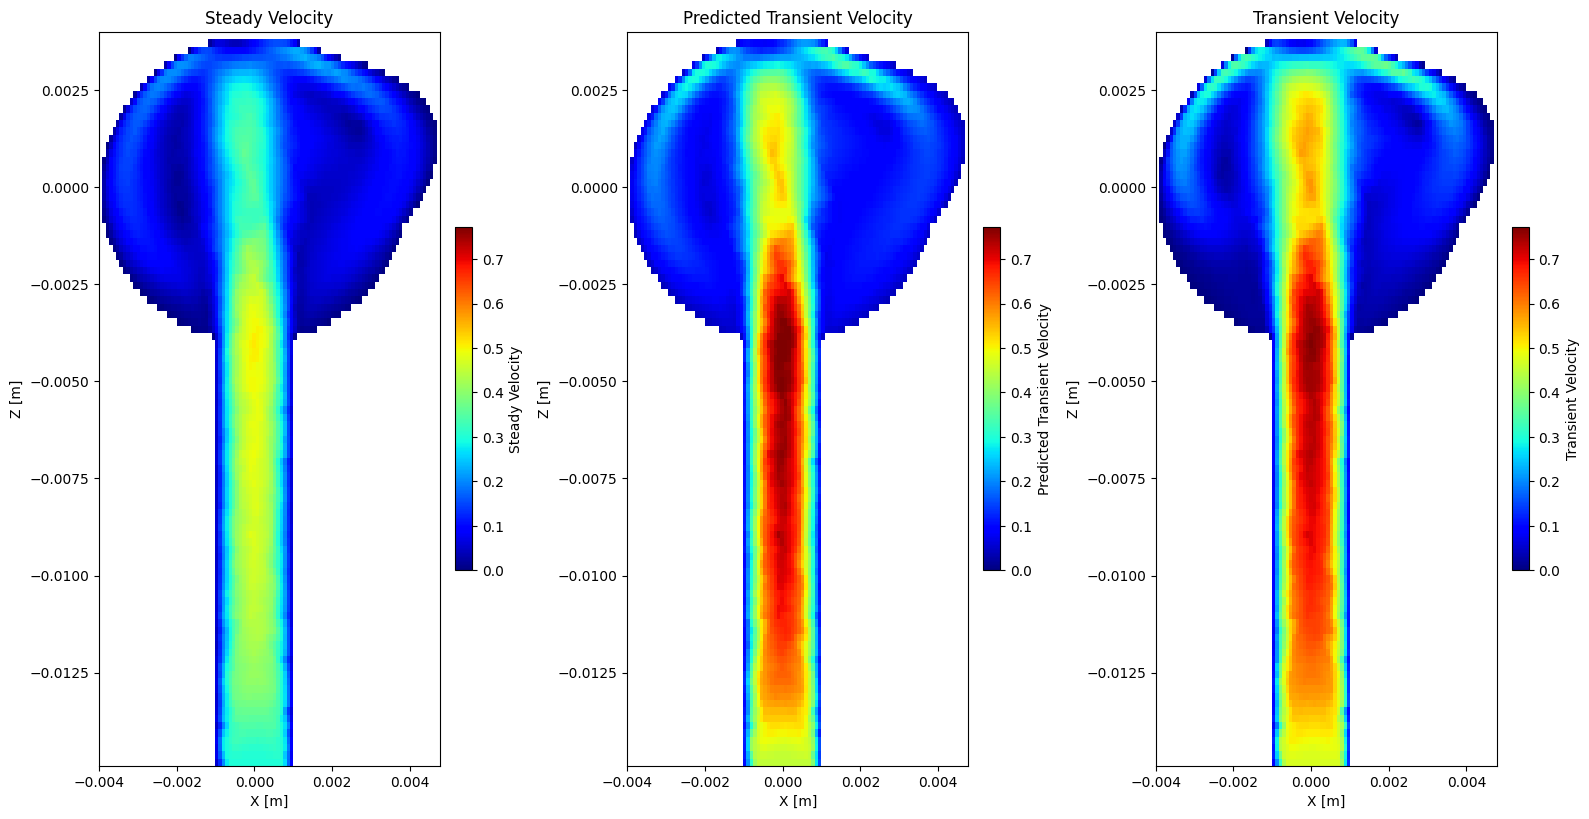

In [11]:
# Generate your grid
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values

# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Generate heat maps for velocity
#plt.subplot(1, 1, 1)
fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(16, 26))
fig.patch.set_facecolor('white')

im0 = ax0.imshow(masked_velocity0.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im0, ax=ax0, label='Steady Velocity',fraction=0.046, pad=0.04)
ax0.set_title('Steady Velocity')
ax0.set_xlabel("X [m]")
ax0.set_ylabel("Z [m]")
im1 = ax1.imshow(masked_velocity1.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.046, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("X [m]")
ax1.set_ylabel("Z [m]")
im2 = ax2.imshow(masked_velocity2.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.046, pad=0.04)
ax2.set_title('Transient Velocity')
ax2.set_xlabel("X [m]")
ax2.set_ylabel("Z [m]")

# Save the figure to a file with 600x600 pixels

plt.savefig('predicted_velocity_heatmap_N11Transient.png', dpi=100, bbox_inches='tight', pad_inches = 0)
plt.tight_layout()
plt.show()

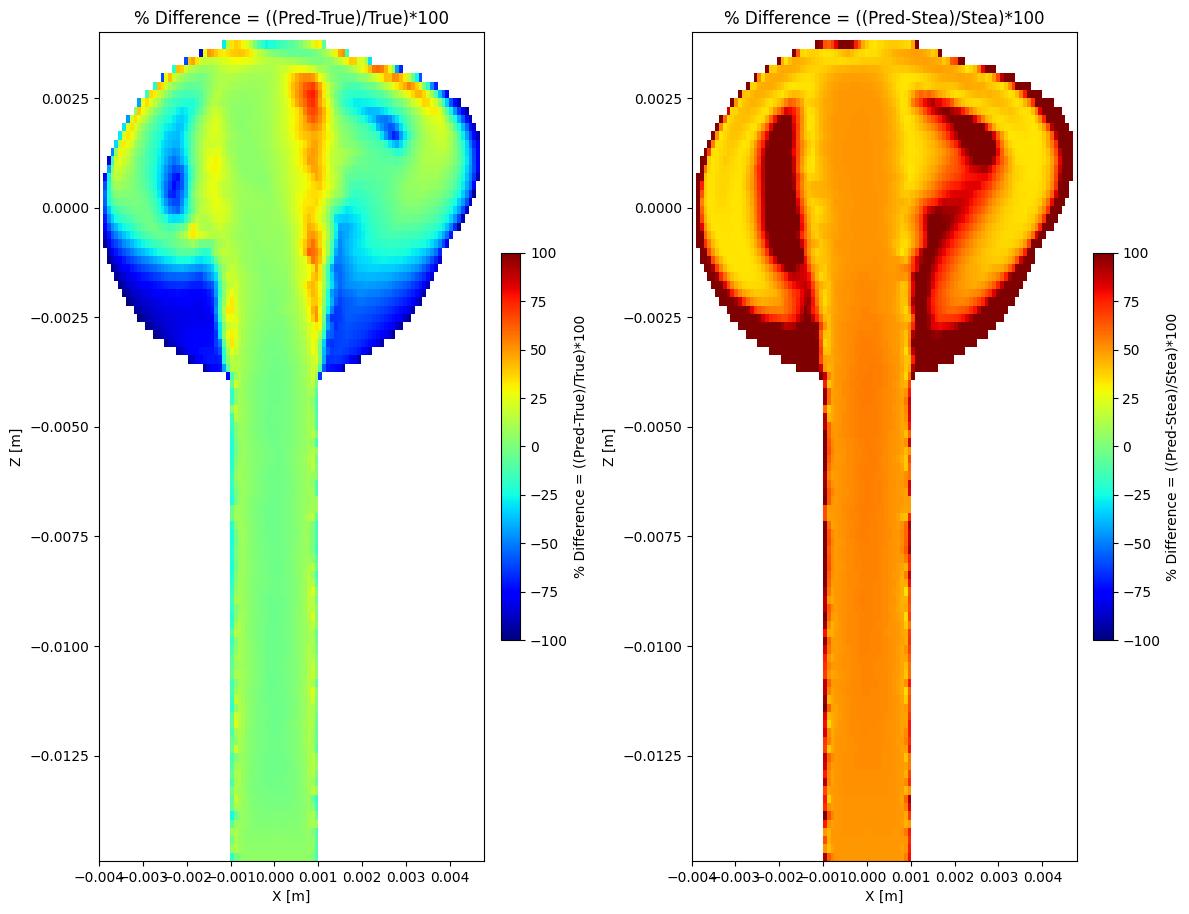

(20.26319889762594, 81.82865271212452)

In [12]:
# Calculate percentage differences
percentage_change3 = ((masked_velocity2 - masked_velocity1) / masked_velocity1) * 100
percentage_change4 = ((masked_velocity1 - masked_velocity0) / masked_velocity0) * 100

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 12))
fig.patch.set_facecolor('white')

# Heatmap for percentage difference between predicted transient and transient truth
im3 = ax3.imshow(percentage_change3.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='% Difference = ((Pred-True)/True)*100', fraction=0.046, pad=0.04)
ax3.set_title('% Difference = ((Pred-True)/True)*100')
ax3.set_xlabel("X [m]")
ax3.set_ylabel("Z [m]")

# Heatmap for percentage difference between predicted transient and steady velocity
im4 = ax4.imshow(percentage_change4.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='% Difference = ((Pred-Stea)/Stea)*100', fraction=0.046, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("X [m]")
ax4.set_ylabel("Z [m]")

plt.tight_layout()
plt.show()
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

average_percentage_change3, average_percentage_change4


MODEL PERFORMANCE CHECK (PREDICTION VS RESULTS)

In [13]:
max_velocity = np.max(Prediction1)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity2 = CFDTransient[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")

relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score( CFDTransient[' Velocity [ m s^-1 ]'], Prediction1)
print(r2)

Maximum velocity from the prediction is: 0.7981178164482117
Maximum velocity from the actual is: 0.773
% is: 3.2493941071425163
0.9609677940196898
